### Self Attention machine  


In [102]:
import torch
inputs = torch.tensor(
    [[0.43, 0.15, 0.89], # Your (x^1)
     [0.55, 0.87, 0.66], # journey (x^2)
     [0.57, 0.85, 0.64], # starts (x^3)
     [0.22, 0.58, 0.33], # with (x^4)
     [0.77, 0.25, 0.10], # one (x^5)
     [0.05, 0.80, 0.55]], requires_grad=True # step (x^6)
)
print(inputs)

tensor([[0.4300, 0.1500, 0.8900],
        [0.5500, 0.8700, 0.6600],
        [0.5700, 0.8500, 0.6400],
        [0.2200, 0.5800, 0.3300],
        [0.7700, 0.2500, 0.1000],
        [0.0500, 0.8000, 0.5500]], requires_grad=True)


In [103]:
query = inputs[1]
attn_scores_2 = torch.empty(inputs.shape[0])
for i, x_i in enumerate(inputs):
    attn_scores_2[i] = torch.dot(x_i, query)
print(attn_scores_2)
attn_weights_2_tmp = attn_scores_2/attn_scores_2.sum()
attn_weights_2_tmp

tensor([0.9544, 1.4950, 1.4754, 0.8434, 0.7070, 1.0865], grad_fn=<CopySlices>)


tensor([0.1455, 0.2278, 0.2249, 0.1285, 0.1077, 0.1656],
       grad_fn=<DivBackward0>)

In [104]:
def softmax_naive(x):
    return torch.exp(x)/torch.exp(x).sum(dim=0)
attn_weights_2_naive = softmax_naive(attn_scores_2)
print("Attention weights:", attn_weights_2_naive)
print("Sum:", attn_weights_2_naive.sum())

Attention weights: tensor([0.1385, 0.2379, 0.2333, 0.1240, 0.1082, 0.1581],
       grad_fn=<DivBackward0>)
Sum: tensor(1., grad_fn=<SumBackward0>)


In [105]:
query = inputs[1]
context_vec_2 = torch.zeros(query.shape)
print(context_vec_2[0])
for i,x_i in enumerate(inputs):
    context_vec_2 += attn_weights_2_naive[i]*x_i
print(context_vec_2)

tensor(0.)
tensor([0.4419, 0.6515, 0.5683], grad_fn=<AddBackward0>)


### Computing attention weights for all input tokens

In [106]:
attn_scores = torch.empty(6,6)
for i, x_i in enumerate(inputs):
    for j,x_j in enumerate(inputs):
        attn_scores[i,j] = torch.dot(x_i,x_j)
print(attn_scores)

tensor([[0.9995, 0.9544, 0.9422, 0.4753, 0.4576, 0.6310],
        [0.9544, 1.4950, 1.4754, 0.8434, 0.7070, 1.0865],
        [0.9422, 1.4754, 1.4570, 0.8296, 0.7154, 1.0605],
        [0.4753, 0.8434, 0.8296, 0.4937, 0.3474, 0.6565],
        [0.4576, 0.7070, 0.7154, 0.3474, 0.6654, 0.2935],
        [0.6310, 1.0865, 1.0605, 0.6565, 0.2935, 0.9450]],
       grad_fn=<CopySlices>)


In [107]:
att_scores = inputs@inputs.T
print(attn_scores)

tensor([[0.9995, 0.9544, 0.9422, 0.4753, 0.4576, 0.6310],
        [0.9544, 1.4950, 1.4754, 0.8434, 0.7070, 1.0865],
        [0.9422, 1.4754, 1.4570, 0.8296, 0.7154, 1.0605],
        [0.4753, 0.8434, 0.8296, 0.4937, 0.3474, 0.6565],
        [0.4576, 0.7070, 0.7154, 0.3474, 0.6654, 0.2935],
        [0.6310, 1.0865, 1.0605, 0.6565, 0.2935, 0.9450]],
       grad_fn=<CopySlices>)


In [108]:
attn_weights = torch.softmax(attn_scores, dim=1)
print(attn_weights)

tensor([[0.2098, 0.2006, 0.1981, 0.1242, 0.1220, 0.1452],
        [0.1385, 0.2379, 0.2333, 0.1240, 0.1082, 0.1581],
        [0.1390, 0.2369, 0.2326, 0.1242, 0.1108, 0.1565],
        [0.1435, 0.2074, 0.2046, 0.1462, 0.1263, 0.1720],
        [0.1526, 0.1958, 0.1975, 0.1367, 0.1879, 0.1295],
        [0.1385, 0.2184, 0.2128, 0.1420, 0.0988, 0.1896]],
       grad_fn=<SoftmaxBackward0>)


In [109]:
all_context_vector=attn_weights@inputs
all_context_vector

tensor([[0.4421, 0.5931, 0.5790],
        [0.4419, 0.6515, 0.5683],
        [0.4431, 0.6496, 0.5671],
        [0.4304, 0.6298, 0.5510],
        [0.4671, 0.5910, 0.5266],
        [0.4177, 0.6503, 0.5645]], grad_fn=<MmBackward0>)

#### Inplement self-attention with trainable weights


In [110]:
x_2 = inputs[1]
d_in = inputs.shape[1]
d_out = 2

In [111]:
torch.manual_seed(123)
W_query = torch.nn.Parameter(torch.rand(d_in, d_out), requires_grad=False)
W_key = torch.nn.Parameter(torch.rand(d_in, d_out), requires_grad=False)
W_value = torch.nn.Parameter(torch.rand(d_in, d_out), requires_grad=False)

In [112]:
query_2 = x_2 @ W_query
key_2 = x_2 @ W_key
value_2 = x_2 @ W_value
print(query_2)

tensor([0.4306, 1.4551], grad_fn=<SqueezeBackward4>)


In [113]:
keys = inputs @ W_key
values = inputs @ W_value
print("keys.shape:", keys)
print("values.shape:", values.shape)
print(keys)

keys.shape: tensor([[0.3669, 0.7646],
        [0.4433, 1.1419],
        [0.4361, 1.1156],
        [0.2408, 0.6706],
        [0.1827, 0.3292],
        [0.3275, 0.9642]], grad_fn=<MmBackward0>)
values.shape: torch.Size([6, 2])
tensor([[0.3669, 0.7646],
        [0.4433, 1.1419],
        [0.4361, 1.1156],
        [0.2408, 0.6706],
        [0.1827, 0.3292],
        [0.3275, 0.9642]], grad_fn=<MmBackward0>)


In [114]:
keys_2 = keys[1]
print(key_2)
print(query_2)
attn_scores_22 = query_2.dot(keys_2)
print(attn_scores_22)

tensor([0.4433, 1.1419], grad_fn=<SqueezeBackward4>)
tensor([0.4306, 1.4551], grad_fn=<SqueezeBackward4>)
tensor(1.8524, grad_fn=<DotBackward0>)


In [115]:
attn_scores_2 = query_2 @ keys.T 
print(attn_scores_2)

tensor([1.2705, 1.8524, 1.8111, 1.0795, 0.5577, 1.5440],
       grad_fn=<SqueezeBackward4>)


In [116]:
d_k = keys.shape[-1]
attn_weights_2 = torch.softmax(attn_scores_2 / d_k**0.5, dim=-1)
print(attn_weights_2)

tensor([0.1500, 0.2264, 0.2199, 0.1311, 0.0906, 0.1820],
       grad_fn=<SoftmaxBackward0>)


In [117]:
context_vec_2 = attn_weights_2@values
context_vec_2

tensor([0.3061, 0.8210], grad_fn=<SqueezeBackward4>)

In [118]:
import torch.nn as nn
class SelfAttention_v1(nn.Module):
    def __init__(self, d_in, d_out):
        super().__init__()
        self.W_query = nn.Parameter(torch.rand(d_in,d_out))
        self.W_key   = nn.Parameter(torch.rand(d_in,d_out))
        self.W_value = nn.Parameter(torch.rand(d_in,d_out))
    def forward(self,x):
        keys    = x@self.W_key
        queries = x@self.W_query
        values  = x@self.W_value
        attn_scores = queries @ keys.T
        attn_weight = torch.softmax(attn_scores/keys.shape[-1]**0.5, dim=-1)
        context_vec = attn_weight@values
        return context_vec

In [119]:
torch.manual_seed(123)
sa_v1 = SelfAttention_v1(d_in, d_out)
print(sa_v1(inputs))

tensor([[0.2996, 0.8053],
        [0.3061, 0.8210],
        [0.3058, 0.8203],
        [0.2948, 0.7939],
        [0.2927, 0.7891],
        [0.2990, 0.8040]], grad_fn=<MmBackward0>)


##### Class Self-Attention v2

In [120]:
class SelfAttention_v2(nn.Module):
    def __init__(self, d_in, d_out, qkv_bias = False) -> None:
        super().__init__()
        self.W_query = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.W_key   = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.W_value = nn.Linear(d_in, d_out, bias=qkv_bias)
    def forward(self, x):
        keys = self.W_key(x)
        queries = self.W_query(x)
        values  = self.W_value(x)
        attention_scores = queries@keys.T
        attention_weight = torch.softmax(attention_scores/keys.shape[-1]**0.5, dim=-1)
        context_vec = attention_weight@values
        return context_vec


In [121]:
torch.manual_seed(789)
sa_v2 = SelfAttention_v2(d_in, d_out)
print(sa_v2(inputs))

tensor([[-0.0739,  0.0713],
        [-0.0748,  0.0703],
        [-0.0749,  0.0702],
        [-0.0760,  0.0685],
        [-0.0763,  0.0679],
        [-0.0754,  0.0693]], grad_fn=<MmBackward0>)


In [122]:
queries = sa_v2.W_query(inputs)
keys    = sa_v2.W_key(inputs)
attn_scores= queries@keys.T
attn_weights = torch.softmax(att_scores/keys.shape[-1]**0.5, dim=-1)
context_length = attn_scores.shape[0]
mask_simple    = torch.tril(torch.ones(context_length, context_length))
print(mask_simple)

tensor([[1., 0., 0., 0., 0., 0.],
        [1., 1., 0., 0., 0., 0.],
        [1., 1., 1., 0., 0., 0.],
        [1., 1., 1., 1., 0., 0.],
        [1., 1., 1., 1., 1., 0.],
        [1., 1., 1., 1., 1., 1.]])


In [123]:
mask_simple = attn_weights*mask_simple
mask_simple

tensor([[0.1972, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.1476, 0.2164, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.1479, 0.2157, 0.2129, 0.0000, 0.0000, 0.0000],
        [0.1505, 0.1952, 0.1933, 0.1525, 0.0000, 0.0000],
        [0.1571, 0.1874, 0.1885, 0.1453, 0.1819, 0.0000],
        [0.1473, 0.2033, 0.1996, 0.1500, 0.1160, 0.1839]],
       grad_fn=<MulBackward0>)

In [124]:
row_sums = mask_simple.sum(dim=-1, keepdim=True)
masked_simple_norm = mask_simple / row_sums
print(masked_simple_norm)

tensor([[1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.4056, 0.5944, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.2566, 0.3741, 0.3693, 0.0000, 0.0000, 0.0000],
        [0.2176, 0.2823, 0.2796, 0.2205, 0.0000, 0.0000],
        [0.1826, 0.2178, 0.2191, 0.1689, 0.2115, 0.0000],
        [0.1473, 0.2033, 0.1996, 0.1500, 0.1160, 0.1839]],
       grad_fn=<DivBackward0>)


#### Better mask

In [125]:
mask = torch.triu(torch.ones(context_length, context_length), diagonal=1)
masked = attn_scores.masked_fill(mask.bool(),-torch.inf)
attn_weights = torch.softmax(masked/keys.shape[-1]**0.5, dim=1)
print(attn_weights)

tensor([[1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.5517, 0.4483, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.3800, 0.3097, 0.3103, 0.0000, 0.0000, 0.0000],
        [0.2758, 0.2460, 0.2462, 0.2319, 0.0000, 0.0000],
        [0.2175, 0.1983, 0.1984, 0.1888, 0.1971, 0.0000],
        [0.1935, 0.1663, 0.1666, 0.1542, 0.1666, 0.1529]],
       grad_fn=<SoftmaxBackward0>)


In [126]:
dropout = torch.nn.Dropout(p=0.5)
example = torch.ones(6, 6)
print(dropout(attn_weights))

tensor([[2.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [1.1034, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.6194, 0.6206, 0.0000, 0.0000, 0.0000],
        [0.5517, 0.4921, 0.4925, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.3968, 0.3775, 0.0000, 0.0000],
        [0.0000, 0.3327, 0.3331, 0.3084, 0.0000, 0.3058]],
       grad_fn=<MulBackward0>)


### Implement the atttention class


In [127]:
batch = torch.stack((inputs, inputs), dim=0)
print(batch.shape)

torch.Size([2, 6, 3])


In [128]:
class CausalAttention(nn.Module):
    def __init__(self, d_in, d_out, context_length, dropout, qkv_bias= False):
        super().__init__()
        self.d_out = d_out
        self.W_query = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.W_key   = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.W_value = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.dropout = torch.nn.Dropout(p=dropout)
        self.register_buffer('mask',torch.triu(torch.ones(context_length,context_length), diagonal=1))
    def forward(self,x):
        b, num_tokens, d_in = x.shape
        keys                = self.W_key(x)
        queries             = self.W_query(x)
        values              = self.W_value(x)
        attn_scores         = queries@keys.transpose(1,2)
        attn_scores.masked_fill_(self.mask.bool()[:num_tokens, :num_tokens], -torch.inf)
        attn_weights        = torch.softmax(attn_scores / keys.shape[-1]**0.5, dim=-1)
        attn_weights        = self.dropout(attn_weights)
        context_vec         = attn_weights @ values
        return context_vec


In [129]:
torch.manual_seed(123)
context_length = batch.shape[1]
ca = CausalAttention(d_in, d_out, context_length, 0.0)
context_vecs = ca(batch)
print("context_vecs.shape:", context_vecs.shape)

context_vecs.shape: torch.Size([2, 6, 2])


### 3.6 Extending single-head to multi head attentions


In [130]:
class MultiHeadAttentionWrapper(nn.Module):
    def __init__(self, d_in, d_out, context_length,dropout, num_heads, qkv_bias=False):
        super().__init__()
        self.heads = nn.ModuleList(
            [CausalAttention(d_in, d_out, context_length, dropout, qkv_bias) for _ in range(num_heads)]
 )
    def forward(self, x):
        return torch.cat([head(x) for head in self.heads], dim=-1)
    

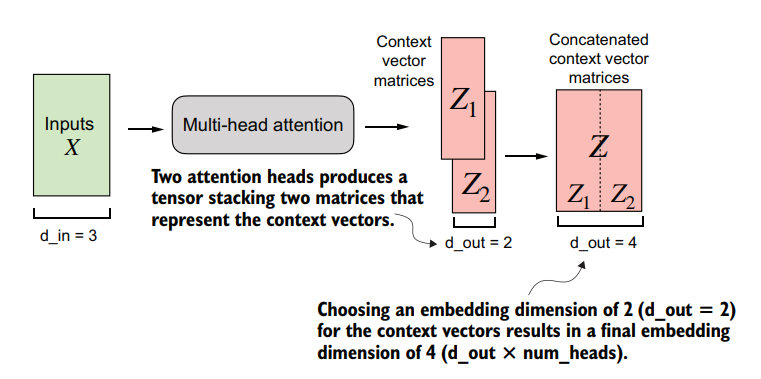

In [132]:
torch.manual_seed(123)
context_length = batch.shape[1]
d_in, d_out = 3,2
mha = MultiHeadAttentionWrapper(d_in,d_out,context_length,0.0,num_heads=2)
context_vecs = mha(batch)
print(context_vecs)

tensor([[[-0.4519,  0.2216,  0.4772,  0.1063],
         [-0.5874,  0.0058,  0.5891,  0.3257],
         [-0.6300, -0.0632,  0.6202,  0.3860],
         [-0.5675, -0.0843,  0.5478,  0.3589],
         [-0.5526, -0.0981,  0.5321,  0.3428],
         [-0.5299, -0.1081,  0.5077,  0.3493]],

        [[-0.4519,  0.2216,  0.4772,  0.1063],
         [-0.5874,  0.0058,  0.5891,  0.3257],
         [-0.6300, -0.0632,  0.6202,  0.3860],
         [-0.5675, -0.0843,  0.5478,  0.3589],
         [-0.5526, -0.0981,  0.5321,  0.3428],
         [-0.5299, -0.1081,  0.5077,  0.3493]]], grad_fn=<CatBackward0>)


#### Implement multi-head attention with weight splits

In [ ]:
class MuitiHeadAttention(nn.Module):
    def __init__